# Loading data

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
print(tf.__version__)

1.13.1


In [ ]:
import json
import numpy as np
import os
from random import shuffle

datadir = './data'
fulldir = os.path.join(os.getcwd(), datadir)
allfiles = os.listdir(fulldir)

dataset = []

for filename in allfiles:
    filepath = os.path.join(datadir, filename)
    name = './data/' + filename.split(".")[0]

    with open(name + '.json', 'r') as file:
        person = json.load(file)
    dataset.append(person)
    
X = []
y = []

for person in dataset:
    spectogram = person['spectogram']/np.float32(255) #normalize input pixels 
    status = int(person['status'])
    X.append(spectogram)
    y.append(status)
X = np.array(X)
y = np.array(y)

X = X.reshape((1372, 28, 28, 1))
print('X shape: ', X.shape, 'y shape: ', y.shape)

X shape:  (1372, 28, 28, 1) y shape:  (1372,)


# Data division

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=1)

train_data.shape

(1097, 28, 28, 1)

# Convolutional base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        501       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        28936     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          57773     
Total params: 87,209
Trainable params: 87,209
Non-trainable params: 0
_________________________________________________________________


# Dense layer at the top

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        501       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        28936     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          57773     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                57773     
__________

# Train model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10)

Train on 1097 samples, validate on 295 samples
Epoch 1/10
1097/1097 [==============================] - 1s 3ms/sample - loss: 0.6932 - acc: 0.5029
Epoch 2/10
1097/1097 [==============================] - 1s 893us/sample - loss: 0.6819 - acc: 0.5792
Epoch 3/10
1097/1097 [==============================] - 1s 761us/sample - loss: 0.6709 - acc: 0.5815
Epoch 4/10
1097/1097 [==============================] - 1s 4ms/sample - loss: 0.6503 - acc: 0.6123
Epoch 5/10
1097/1097 [==============================] - 1s 873us/sample - loss: 0.6368 - acc: 0.6420
Epoch 6/10
1097/1097 [==============================] - 1s 895us/sample - loss: 0.6366 - acc: 0.6249
Epoch 7/10
1097/1097 [==============================] - 1s 923us/sample - loss: 0.6314 - acc: 0.6442
Epoch 8/10
1097/1097 [==============================] - 1s 937us/sample - loss: 0.6175 - acc: 0.6648
Epoch 9/10
1097/1097 [==============================] - 1s 956us/sample - loss: 0.6121 - acc: 0.6659
Epoch 10/10
1097/1097 [=========================

# Test model

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

342/342 [==============================] - 0s 320us/sample - loss: 0.5231 - acc: 0.6975


In [ ]:
print(test_acc)

0.69746123


In [ ]:
import matplotlib.pyplot as plt

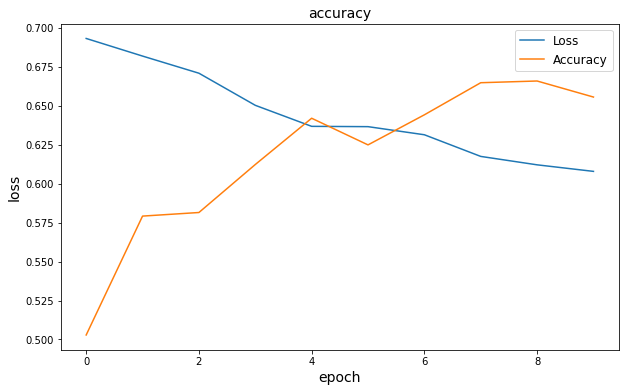

In [ ]:
f = plt.figure(figsize=(10,6))
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["acc"],label="Accuracy")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('accuracy', fontsize=14)
plt.legend(fontsize='large')